In [ ]:
#  !pip install TensorFlow==2.0

In [ ]:
# Import required libraries

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.3.0


In [ ]:
# Define parameters

ip_dim = 2
op_dim = 1
learning_rate = 0.01

# Weight Matrix
w = tf.Variable(tf.random.uniform(shape=(ip_dim, op_dim)))
# Bias Vector
b = tf.Variable(tf.zeros(shape=(op_dim,)))

# Function to compute predictions
def compute_pred(features):
  pred = tf.matmul(features, w) + b
  return pred

# Function to compute loss
def compute_loss(labels, preds):
  loss = tf.reduce_mean(tf.square(labels - preds))
  return loss

# Founcton to train on a batch
def train_batch(x,y):
  with tf.GradientTape() as tape:
    prediction = compute_pred(x)
    loss = compute_loss(y, prediction)
    loss_w,loss_b = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * loss_w)
  b.assign_sub(learning_rate * loss_b)
  return loss


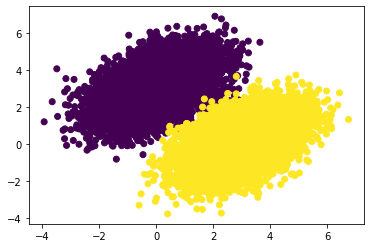

In [ ]:
# Prepare a dataset

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size= 10000)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=10000)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((10000, 1), dtype='float32'),
                    np.ones((10000, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [ ]:
# Shuffle data
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a dataset object
data = tf.data.Dataset.from_tensor_slices((features, labels))
data = data.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(data):
    loss = train_batch(x, y)
  print('Epoch {} : last batch loss = {}'.format(epoch, float(loss)))

Epoch 0 : last batch loss = 0.037101879715919495
Epoch 1 : last batch loss = 0.024732012301683426
Epoch 2 : last batch loss = 0.050569675862789154
Epoch 3 : last batch loss = 0.02488464117050171
Epoch 4 : last batch loss = 0.028481239452958107
Epoch 5 : last batch loss = 0.021332627162337303
Epoch 6 : last batch loss = 0.026203088462352753
Epoch 7 : last batch loss = 0.024853486567735672
Epoch 8 : last batch loss = 0.031011449173092842
Epoch 9 : last batch loss = 0.026165738701820374


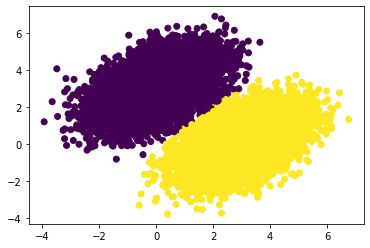

In [ ]:
# Make predictions

prediction = compute_pred(features)
plt.scatter(features[:, 0], features[:, 1], c=prediction[:, 0] > 0.5)